# Arima baseline
## The notebook is structured as :
1. Import the data (validation =~ last month)
2. AIC test to check the best parameters (p,d,q) /!\ No seasoning consid for the moment
3. test the model retrained every hour on the last 96 steps
4. test the model trained ONCE on the week before valid data, actual data are then used to forecast the following hour 

# Import data

In [118]:
import pandas as pd

In [119]:
#chosen validation index
index_low = 335428
index_up = 338403
#used number of steps prior to val data
num_prior = 4*24*8 #8 days

path = r'C:\Users\Cyril\Documents\Trail2024\Processed_data.csv'
df = pd.read_csv(path, sep=",")

#extract data
df_data = df[(index_low-num_prior):index_up+1]

#get only the load data (preprocessed data already in the good order (most recent data = last of the dataset))
data_load = df_data["Total Load"].reset_index(drop=True)

#only the training data (last week or last day depending on the 2 approaches --> for simplicity here only AIC on 1 week (as it includes the day)) 
data_AIC = data_load[:num_prior]

#only validation data
data_val = data_load[num_prior:].reset_index(drop=True)


# AIC

## checking stationarity

In [120]:
import matplotlib.pyplot as plt

In [121]:
window_size = 50

## d = 0

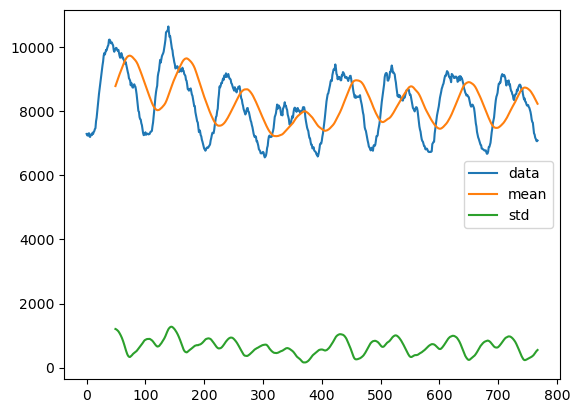

In [122]:
y = data_AIC
y_mean = y.rolling(window=window_size).mean()
y_std = y.rolling(window=window_size).std()

plt.figure()
plt.plot(y,label = 'data')
plt.plot(y_mean, label = 'mean')
plt.plot(y_std, label = 'std')
plt.legend()

non stationary

## d = 1

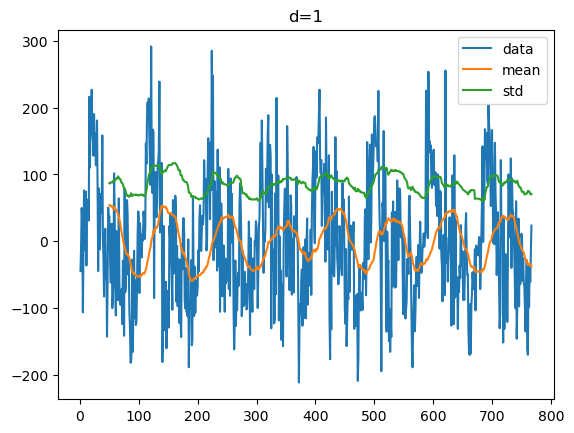

In [123]:
y_diff = y.diff().dropna()
y_diff_mean = y_diff.rolling(window=window_size).mean()
y_diff_std = y_diff.rolling(window=window_size).std()

plt.figure()
plt.title('d=1')
plt.plot(y_diff,label = 'data')
plt.plot(y_diff_mean, label = 'mean')
plt.plot(y_diff_std, label = 'std')
plt.legend()

non stationary

## d = 2

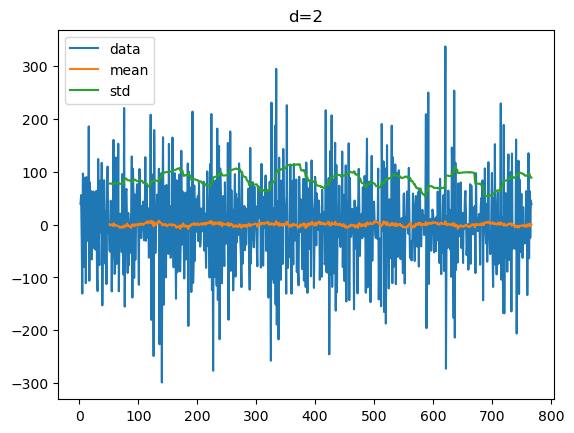

In [124]:
y_diffdiff = y_diff.diff().dropna()
y_diffdiff_mean = y_diffdiff.rolling(window=window_size).mean()
y_diffdiff_std = y_diffdiff.rolling(window=window_size).std()

plt.figure()
plt.title('d=2')
plt.plot(y_diffdiff,label = 'data')
plt.plot(y_diffdiff_mean, label = 'mean')
plt.plot(y_diffdiff_std, label = 'std')
plt.legend()

stationary -> d=2

In [125]:
d = 2

## p, q parameters via AIC

In [126]:
from statsmodels.tsa.arima.model import ARIMA

In [127]:
#  p (autoregressive order) and q (moving average order).
# Define the range of p, d, q values to explore
p_values = range(0, 4)
d_values = [d]  # Since we are using second-order differencing 
q_values = range(0, 4)
 
# Initialize variables to store the best model and its AIC
best_aic = float("inf")
best_order = None
best_model = None
 
# Grid search to find the best ARIMA model
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit the ARIMA model
                model = ARIMA(data_AIC, order=(p, d, q))
                fitted_model = model.fit()
 
                # Check AIC value
                aic = fitted_model.aic
                print(f'ARIMA({p}, {d}, {q}) AIC: {aic}')
 
                # Update best model if current model is better
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = fitted_model
            except Exception as e:
                print(f'ARIMA({p}, {d}, {q}) failed: {e}')
                continue
 
print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')

ARIMA(0, 2, 0) AIC: 8984.449759244591
ARIMA(0, 2, 1) AIC: 8734.219933369895
ARIMA(0, 2, 2) AIC: 8735.768487388155
ARIMA(0, 2, 3) AIC: 8737.701418874654
ARIMA(1, 2, 0) AIC: 8820.488669403057
ARIMA(1, 2, 1) AIC: 8735.748181439714


C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 2) AIC: 8711.778879241712
ARIMA(1, 2, 3) AIC: 8739.77850896498
ARIMA(2, 2, 0) AIC: 8762.280458670575
ARIMA(2, 2, 1) AIC: 8737.479651210924
ARIMA(2, 2, 2) AIC: 8739.121352316171


C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 3) AIC: 8710.864536857338
ARIMA(3, 2, 0) AIC: 8746.954262528065


C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 1) AIC: 8716.96223257435


C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 2) AIC: 8713.608598295279
ARIMA(3, 2, 3) AIC: 8715.38146276115
Best ARIMA order: (2, 2, 3) with AIC: 8710.864536857338


C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Results show (2,2,3) seem to be the best but very close to (1,2,2) -> (1,2,2) chosen for "lightness"

# 1 day training + refitting every hour

In [ ]:
#
Order = (1,2,2)

# Parameters 
train_steps = 96  # 96 steps training window 
forecast_steps = 4  # we want to predict 4 steps

# Listes pour stocker les prédictions et les valeurs réelles
predictions = []
true_values = []

# Boucle à travers les données avec une fenêtre glissante
for start in range(data_AIC.size-train_steps, len(data_load) - train_steps - forecast_steps + 1, forecast_steps):
    # Définir les données d'entraînement
    train_data = data_load[start:start + train_steps]
    test_data = data_load[start + train_steps:start + train_steps + forecast_steps]
    
    # Créer et ajuster le modèle ARIMA
    model = ARIMA(train_data, order=Order)  
    model_fit = model.fit()
    
    # Faire des prédictions
    forecast = model_fit.forecast(steps=forecast_steps)
    predictions.extend(forecast)

    # Libérer la mémoire en supprimant le modèle
    del model
    del model_fit


C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Cyril\anaconda3\envs\Trail2024\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Us

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

In [ ]:
print(data_val)
print(predictions)


In [ ]:
# saving the predictions in a csv file

# Define the filename and save path of the preds and true values
patho = r'C:\Users\Cyril\Documents\Trail2024\Arima1daymetrics.csv'

df = pd.DataFrame(predictions, columns=['Prediction'])  

df.to_csv(patho, index=True)


pathbis = r'C:\Users\Cyril\Documents\Trail2024\truth.csv'

df_data_val = pd.DataFrame(data_val, columns=['Total Load'])

df2.to_csv(pathbis, index=True)


In [ ]:
print(truth["Total Load Interpolated"][::4])
print(predictions["Prediction"][::4])

In [ ]:
# evaluate func from Pascal

predictions = pd.read_csv(patho)
truth = pd.read_csv(pathbis)


t0_rmse = root_mean_squared_error(truth["Total Load Interpolated"][::4], predictions["Prediction"][::4])
t1_rmse = root_mean_squared_error(truth["Total Load Interpolated"][1::4], predictions["Prediction"][1::4])
t2_rmse = root_mean_squared_error(truth["Total Load Interpolated"][2::4], predictions["Prediction"][2::4])
t3_rmse = root_mean_squared_error(truth["Total Load Interpolated"][3::4], predictions["Prediction"][3::4])

t0_mape = mean_absolute_percentage_error(truth["Total Load Interpolated"][::4], predictions["Prediction"][::4])
t1_mape = mean_absolute_percentage_error(truth["Total Load Interpolated"][1::4], predictions["Prediction"][1::4])
t2_mape = mean_absolute_percentage_error(truth["Total Load Interpolated"][2::4], predictions["Prediction"][2::4])
t3_mape = mean_absolute_percentage_error(truth["Total Load Interpolated"][3::4], predictions["Prediction"][3::4])

print("|Model Name|RMSE t+1|RMSE t+2|RMSE t+3|RMSE t+4|MAPE t+1|MAPE t+2|MAPE t+3|MAPE t+4|")
print("| |", str(t0_rmse)[:7], "|", str(t1_rmse)[:7], "|", str(t2_rmse)[:7], "|", str(t3_rmse)[:7],
      "|", str(t0_mape)[:7], "|", str(t1_mape)[:7], "|", str(t2_mape)[:7], "|", str(t3_mape)[:7], "|", sep="")

# 1 week training and no refitting

In [ ]:
#to be modified : data_val without reindiexing
data_val = data_load[num_prior:]

# Parameters
train_steps = 96*7  # 1 week training window
forecast_steps = 4  # 4 steps forecast


#definition of the training week
train_data = data_AIC[len(data_AIC)-96:]

# Create and train the model
model = ARIMA(train_data, order=Order)  
model_fit = model.fit()

# Listes pour stocker les prédictions et les valeurs réelles
predictions = []

# Boucle à travers les données avec une fenêtre glissante
for start in range(0, len(data_val) - forecast_steps + 1, forecast_steps):

    test_data = data_val[start:start + forecast_steps]
    
    # Faire des prédictions
    forecast = model_fit.forecast(steps=forecast_steps)     
    predictions.extend(forecast)
    

    #it uses the last values seen during the traing (last values of the dataset to predict the 4 following steps, meaning that by this code we should refit each time some needs to be changed)
    #now, with.append and refit=False, the model keeps its parameters but add last actual values it a way that it consideres now the good values
    model_fit = model_fit.append(test_data, refit=False)
    
    #The loop is time consumming due the the management of data, the method is thr good one


In [ ]:
# saving the predictions in a csv file

# Define the filename and save path of the preds and true values
pathos = r'C:\Users\Cyril\Documents\Trail2024\Arima1weekmetrics.csv'

df = pd.DataFrame(predictions, columns=['Prediction'])  

df.to_csv(pathos, index=True)



In [ ]:
# evaluate func from Pascal

predictions = pd.read_csv(pathos)
truth = pd.read_csv(pathbis)


t0_rmse = root_mean_squared_error(truth["Total Load Interpolated"][::4], predictions["Prediction"][::4])
t1_rmse = root_mean_squared_error(truth["Total Load Interpolated"][1::4], predictions["Prediction"][1::4])
t2_rmse = root_mean_squared_error(truth["Total Load Interpolated"][2::4], predictions["Prediction"][2::4])
t3_rmse = root_mean_squared_error(truth["Total Load Interpolated"][3::4], predictions["Prediction"][3::4])

t0_mape = mean_absolute_percentage_error(truth["Total Load Interpolated"][::4], predictions["Prediction"][::4])
t1_mape = mean_absolute_percentage_error(truth["Total Load Interpolated"][1::4], predictions["Prediction"][1::4])
t2_mape = mean_absolute_percentage_error(truth["Total Load Interpolated"][2::4], predictions["Prediction"][2::4])
t3_mape = mean_absolute_percentage_error(truth["Total Load Interpolated"][3::4], predictions["Prediction"][3::4])

print("|Model Name|RMSE t+1|RMSE t+2|RMSE t+3|RMSE t+4|MAPE t+1|MAPE t+2|MAPE t+3|MAPE t+4|")
print("| |", str(t0_rmse)[:7], "|", str(t1_rmse)[:7], "|", str(t2_rmse)[:7], "|", str(t3_rmse)[:7],
      "|", str(t0_mape)[:7], "|", str(t1_mape)[:7], "|", str(t2_mape)[:7], "|", str(t3_mape)[:7], "|", sep="")